# Article Recommender System

### 1.1 Introduction

There are many articles and blogs being produced everyday. With the rise in technology and social media, it is becoming easier to read articles from various sources. Therefore, information is available on the internet and people are using this to gain education and get a good understanding of the world. 

There are companies such as __Medium__ which generate revenue based on user engagement on their articles and blogs. When a reader goes through a blog and finds it insightful, he/she might be willing to read documents that are quite similar to the one read earlier. But if readers are not able to find similar documents, they would often not be interested and not engaged. Therefore, it would be great if we could provide recommendation to users based on the articles read by them. As a result, readers are likely drawn towards reading more articles and perhaps subscribing to services so that they get engaging and useful content.

### 1.2 Source
This data was available from __Kaggle__ - a website that gives permission to users to download large datasets for machine learning purposes. Below is the link to the website that was used to download the articles and the data associated with it. 

https://www.kaggle.com/datasets/gspmoreira/articles-sharing-reading-from-cit-deskdrop?select=shared_articles.csv

## Table of Contents



In [405]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
import missingno as msno
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm
from nltk.tokenize import sent_tokenize
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.feature_extraction.text import TfidfVectorizer

In [406]:
df = pd.read_csv('shared_articles.csv')

In [407]:
df.head()

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [408]:
df.shape

(3122, 13)

In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122 entries, 0 to 3121
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        3122 non-null   int64 
 1   eventType        3122 non-null   object
 2   contentId        3122 non-null   int64 
 3   authorPersonId   3122 non-null   int64 
 4   authorSessionId  3122 non-null   int64 
 5   authorUserAgent  680 non-null    object
 6   authorRegion     680 non-null    object
 7   authorCountry    680 non-null    object
 8   contentType      3122 non-null   object
 9   url              3122 non-null   object
 10  title            3122 non-null   object
 11  text             3122 non-null   object
 12  lang             3122 non-null   object
dtypes: int64(4), object(9)
memory usage: 317.2+ KB


In [410]:
df.describe()

,timestamp,contentId,authorPersonId,authorSessionId
count,3.122000e+03,3.122000e+03,3.122000e+03,3.122000e+03
mean,1.468804e+09,3.284110e+16,3.984819e+17,1.976675e+17
std,7.571512e+06,5.383734e+18,4.387115e+18,5.403753e+18
min,1.459193e+09,-9.222795e+18,-9.120686e+18,-9.212055e+18
25%,1.462369e+09,-4.660869e+18,-1.578288e+18,-4.651280e+18
50%,1.467136e+09,4.436584e+16,-7.092877e+17,4.154103e+17
75%,1.473873e+09,4.745617e+18,3.609194e+18,4.841644e+18
max,1.488308e+09,9.222265e+18,9.210531e+18,9.221043e+18


<AxesSubplot:>

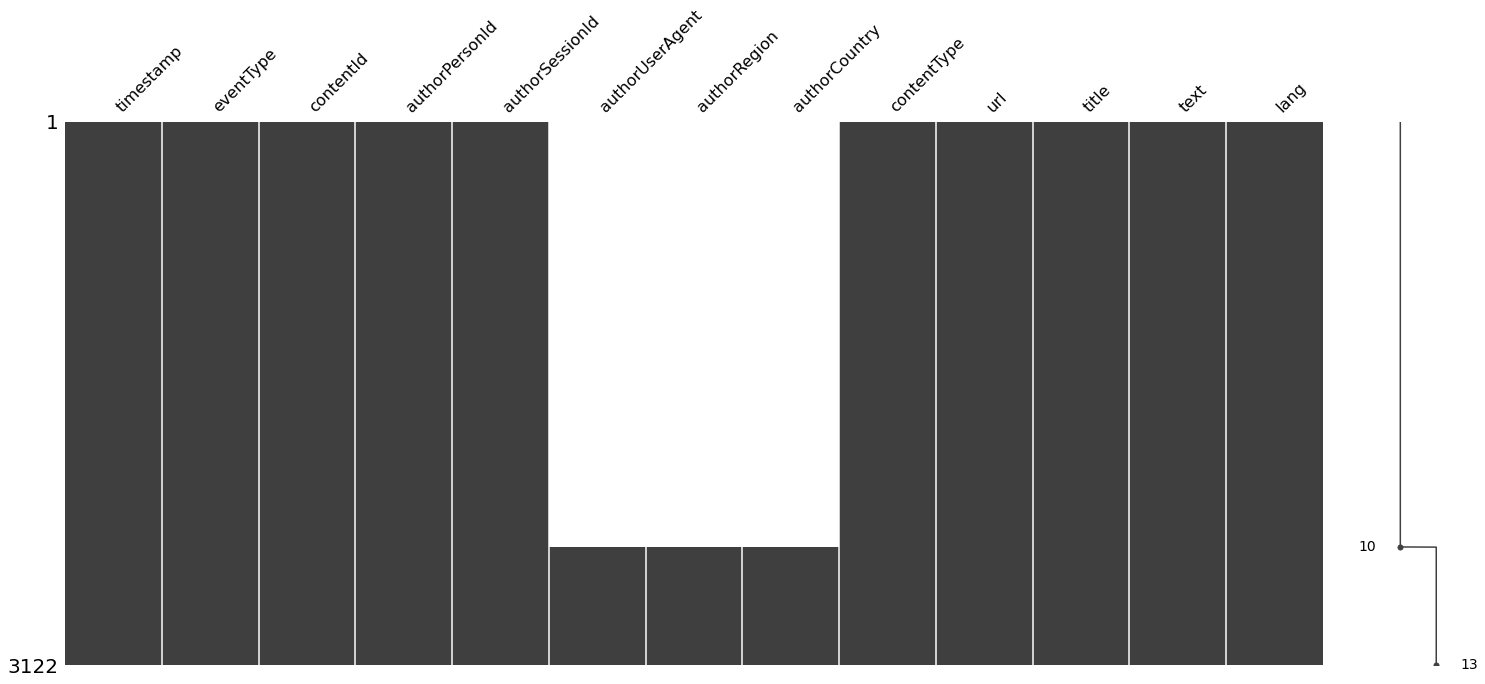

In [411]:
msno.matrix(df)

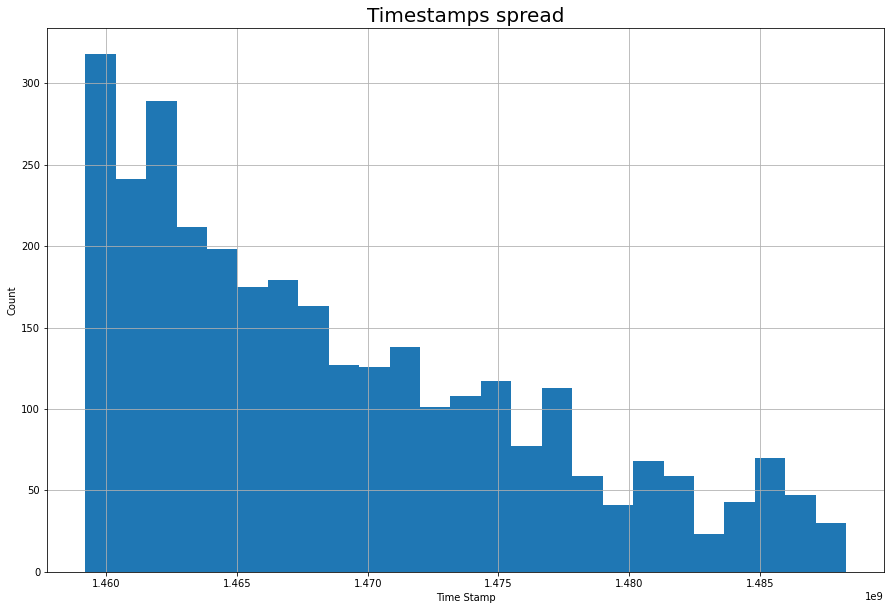

In [412]:
plt.figure(figsize = (15, 10))
df['timestamp'].hist(bins = 25)
plt.title("Timestamps spread", fontsize = 20)
plt.xlabel("Time Stamp")
plt.ylabel("Count")
plt.show()

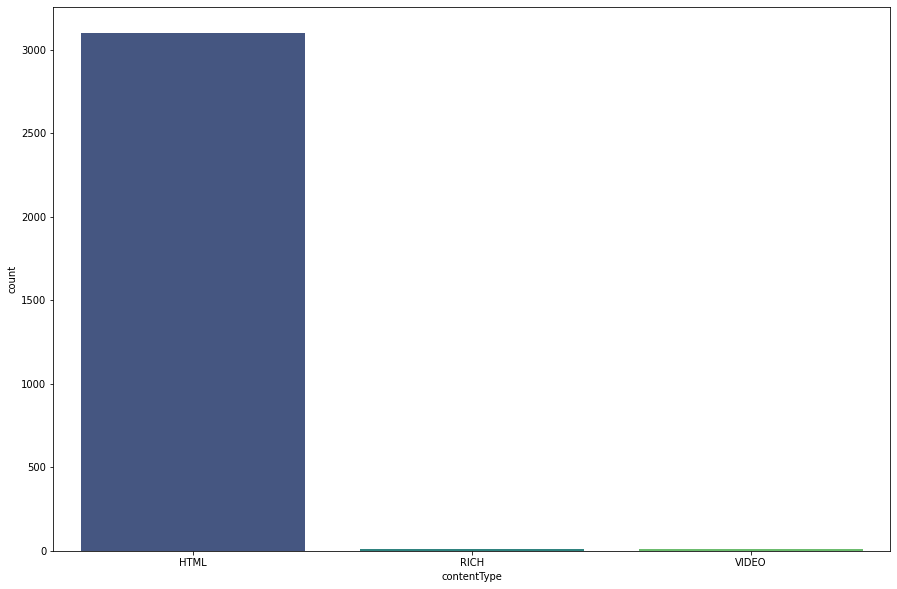

In [413]:
plt.figure(figsize = (15, 10))
sns.countplot(x = 'contentType', data = df, palette = 'viridis')
plt.show()

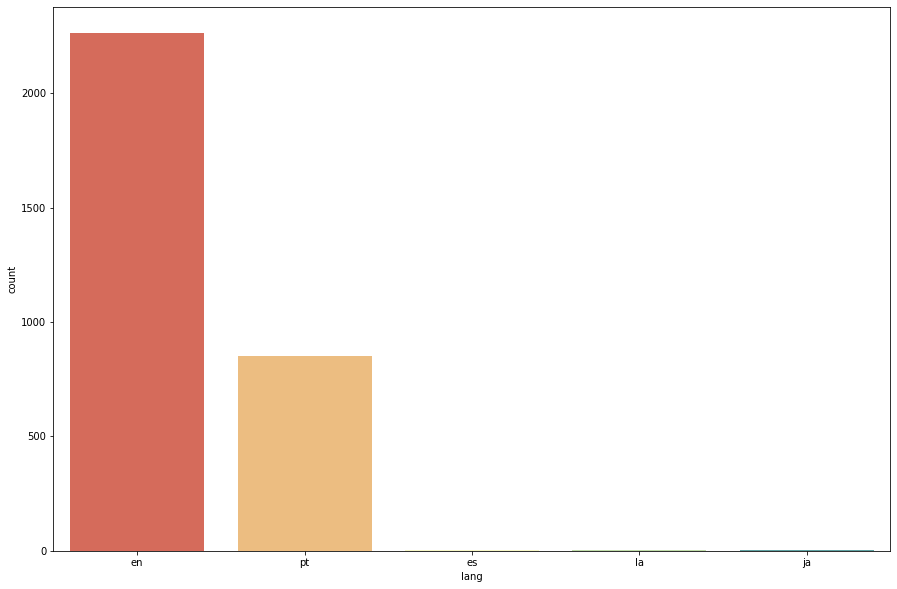

In [414]:
plt.figure(figsize = (15, 10))
sns.countplot(x = 'lang', data = df, palette = 'Spectral')
plt.show()

In [415]:
df = df[df.lang == 'en']

In [416]:
def text_extractor(series):
    text = []
    for i in range(len(series)):
        text.append(series.iloc[i])
    return text

In [417]:
title_text = ' '.join(text_extractor(df['title']))

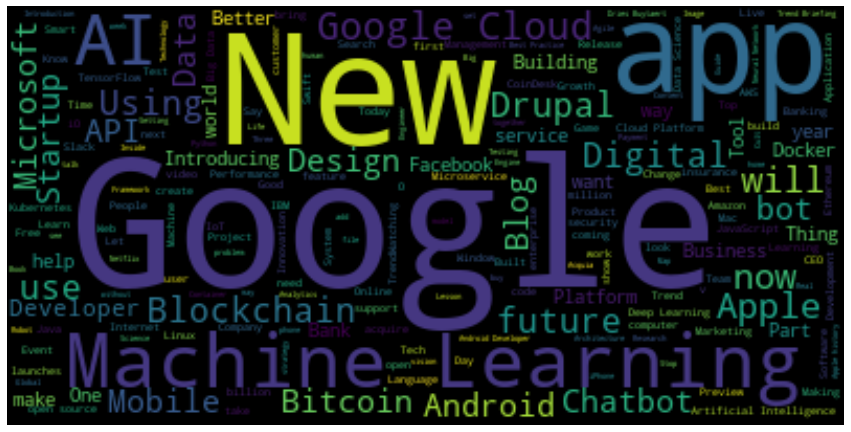

In [418]:
plt.figure(figsize = (15, 10))
wordcloud = WordCloud().generate(title_text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [419]:
main_text = ' '.join(text_extractor(df['text']))

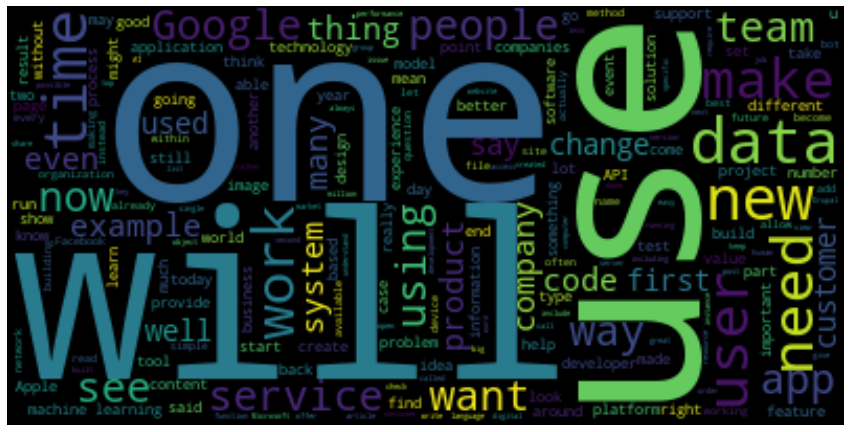

In [420]:
# https://stackoverflow.com/questions/44827346/change-word-color-using-wordcloud-in-python
# Credits to the above website for providing a great detailed explanation of plotting wordcloud with 
# different colors. 
#change the value in return to set the single color need, in hsl format.
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(230,100%%, %d%%)" % np.random.randint(49,51))

plt.figure(figsize = (15, 10))
wordcloud = WordCloud().generate(main_text)
plt.imshow(wordcloud, interpolation = 'bilinear')

wordcloud.recolor(color_func = grey_color_func)
plt.axis("off")
plt.show()

In [421]:
# https://stackoverflow.com/a/47091490/4084039


def decontracted(phrase):
    """
    This function would convert some short letters into the forms that one 
    could easily understand respectively.
    """
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [422]:
def text_preprocessing(df, feature, stemming = False, lemmatize = True):
    pattern = "[^a-zA-Z0-9]"
    english_stopwords = stopwords.words("english")
    preprocessed_text = []
    for i in tqdm(range(len(df[feature]))):
        text = decontracted(df[feature].iloc[i])
        text = re.sub(pattern, ' ', text)
        text = text.lower()
        text = word_tokenize(text)
        text = [word for word in text if word not in english_stopwords]
        text = [word for word in text if word not in string.punctuation]
        if stemming:
            porter_stemmer = PorterStemmer()
            text = " ".join([porter_stemmer.stem(word) for word in text])
        if lemmatize:
            lemmatizer = WordNetLemmatizer()
            text = " ".join([lemmatizer.lemmatize(word) for word in text])
        preprocessed_text.append(text)
    
    return preprocessed_text

In [423]:
preprocessed_text = text_preprocessing(df, feature = "text")

100%|█████████████████████████████████████████████████████████████████████████████| 2264/2264 [00:13<00:00, 162.76it/s]


In [424]:
preprocessed_title = text_preprocessing(df, feature = "title")

100%|████████████████████████████████████████████████████████████████████████████| 2264/2264 [00:00<00:00, 6579.50it/s]


In [425]:
preprocessed_title[:3]

['ethereum virtual currency enables transaction rival bitcoin',
 'ethereum virtual currency enables transaction rival bitcoin',
 'bitcoin future gbpcoin branson win usdcoin trump']

In [426]:
df['title'].iloc[:3].values

array(["Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's",
       "Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's",
       'Bitcoin Future: When GBPcoin of Branson Wins Over USDcoin of Trump'],
      dtype=object)

In [435]:
## https://github.com/suhasmaddali/Predicting-Readability-of-Texts-Using-Machine-Learning/blob/main/Predicting%20Readability%20of%20Texts%20Using%20Machine%20Learning.ipynb
## The function was taken from one of the blogs from Suhas Maddali

def get_useful_features(text_list, stop_words):
    """
    The function would take the dataframe and stopwords and then, convert the excerpts into different features
    such as the number of sentences, words and the length of the lemmas created along with the overall preprocessed
    essay length."""
    sentences = []
    num_of_words = []
    sent_length = []
    word_length = []
    lemma_length = []
    num_of_lemmas = []
    preprocessed_essay_length = []
    initial_text_length = []
    num_of_sentences = []
    text_shortage = []
    
    for text in tqdm(text_list):
        try:
            initial_length = len(text)
            initial_text_length.append(initial_length)
            num_sentences = len(sent_tokenize(text))
            num_of_sentences.append(num_sentences)
            text = re.sub('[^a-zA-Z]', ' ', text)
            text = text.lower()
            text = word_tokenize(text)
            num_words = len(text) 
            num_of_words.append(num_words)
            sent_length.append(num_words/num_sentences)
            word_length.append(initial_length/num_words)
            text = [word for word in text if not word in stop_words]
            lemmatizer = nltk.WordNetLemmatizer()
            text = [lemmatizer.lemmatize(word) for word in text]
            #print(text)
            num_lemmas = len(text)
            num_of_lemmas.append(num_lemmas)
            text = " ".join(text)
            #print(text)
            preprocessed_essay_length_value = len(text)
            preprocessed_essay_length.append(preprocessed_essay_length_value)
            #print(preprocessed_essay_length)
            #print(num_lemmas)
            lemma_length.append(preprocessed_essay_length_value/num_lemmas)
        except:
            continue
        
        text_shortage.append(preprocessed_essay_length_value/initial_length)
        
    final_df = pd.concat([pd.Series(sent_length), pd.Series(num_of_words),
                             pd.Series(word_length), pd.Series(lemma_length),
                             pd.Series(num_of_sentences), pd.Series(initial_text_length),
                             pd.Series(num_of_lemmas), pd.Series(preprocessed_essay_length),
                             pd.Series(text_shortage)], axis = 1)
    final_df.columns = ["sentence_length", "num_of_words", "word_length",
                           "lemma_length", "num_of_sentences",
                           "initial_text_length", "num_of_lemmas",
                           "preprocessed_essay_length", "text_shortage"]
    
    return final_df

In [436]:
features_df_title = get_useful_features(text_list = preprocessed_title, stop_words = english_stopwords)

100%|████████████████████████████████████████████████████████████████████████████| 2264/2264 [00:00<00:00, 7800.04it/s]


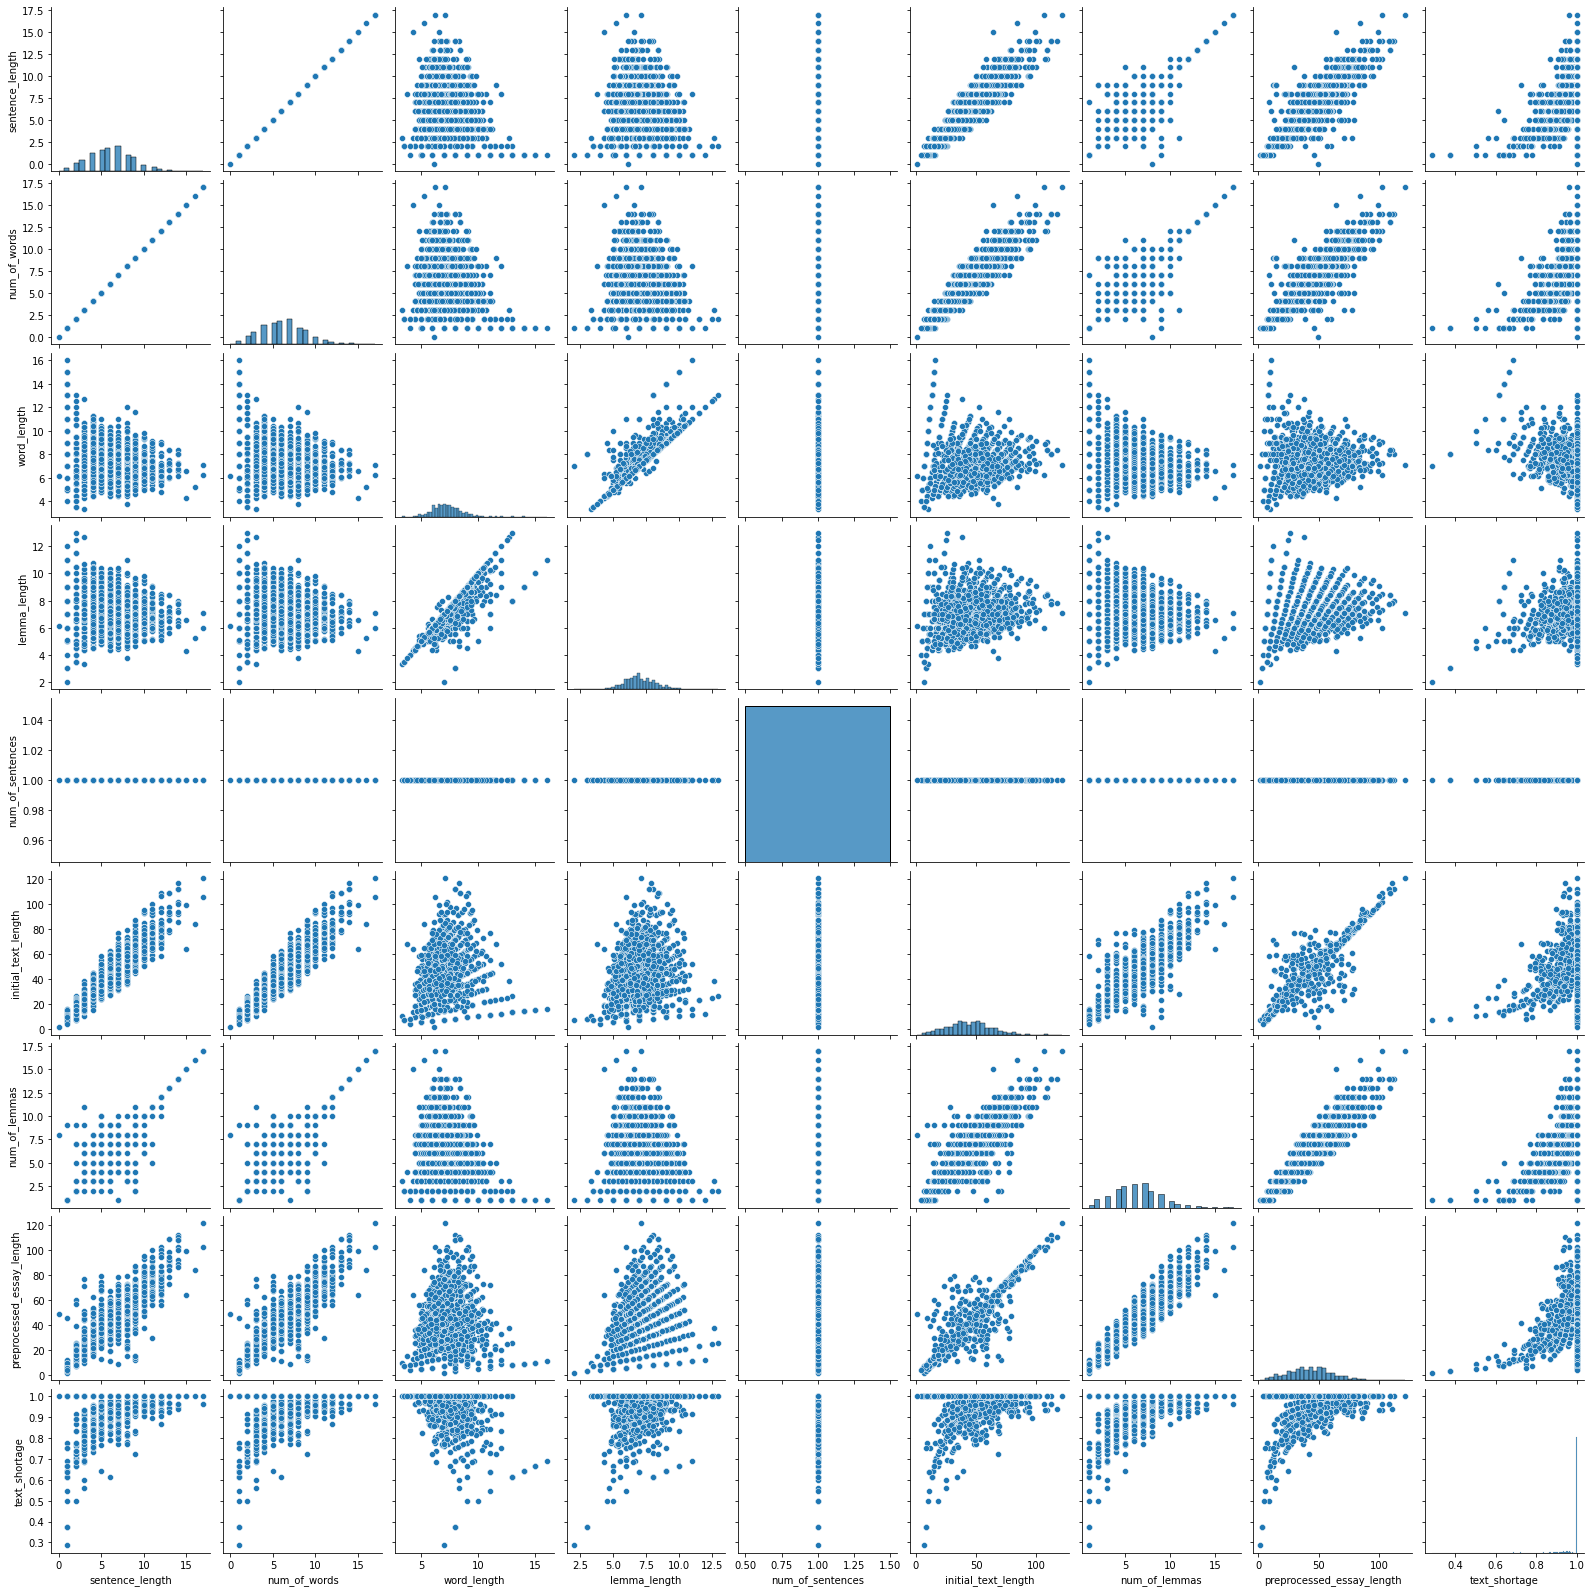

In [437]:
sns.pairplot(data = features_df_title)
plt.show()

In [441]:
features_df_text = get_useful_features(preprocessed_text, stop_words = english_stopwords)

100%|█████████████████████████████████████████████████████████████████████████████| 2264/2264 [00:10<00:00, 218.94it/s]


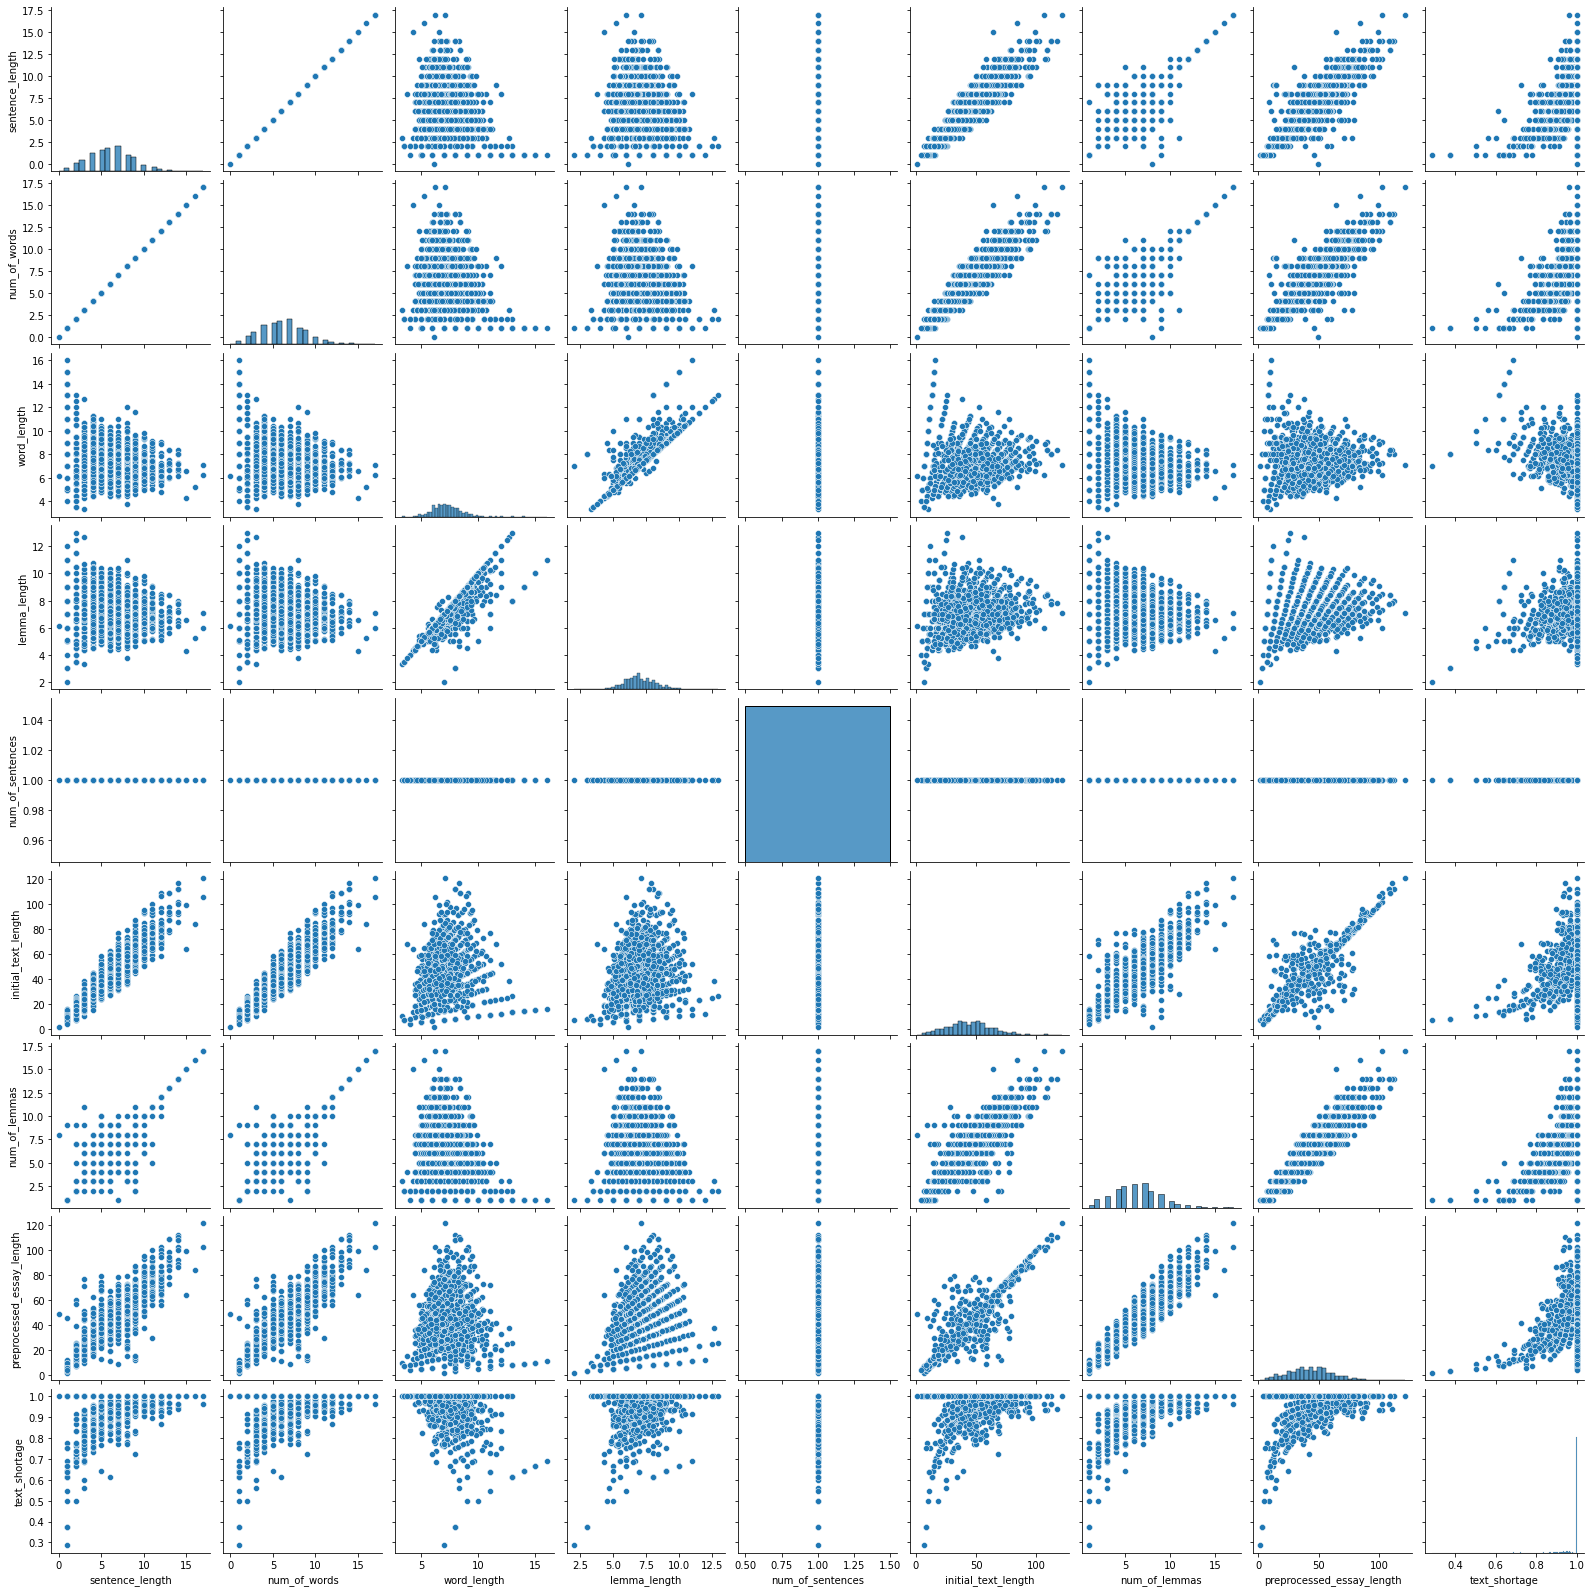

In [442]:
sns.pairplot(data = features_df_title)
plt.show()

In [443]:
features_df_text.head()

,sentence_length,num_of_words,word_length,lemma_length,num_of_sentences,initial_text_length,num_of_lemmas,preprocessed_essay_length,text_shortage
0,599.0,599,7.592654,7.517529,1,4548,599,4503,0.990106
1,599.0,599,7.592654,7.517529,1,4548,599,4503,0.990106
2,203.0,203,7.438424,7.354680,1,1510,203,1493,0.988742
3,151.0,151,6.841060,6.788079,1,1033,151,1025,0.992256
4,699.0,699,7.463519,7.391679,1,5217,697,5152,0.987541


In [444]:
from sklearn.preprocessing import StandardScaler

In [445]:
scaler = StandardScaler()
features_df_title_standardized = scaler.fit_transform(features_df_title)
features_df_text_standardized = scaler.fit_transform(features_df_text)

In [446]:
features_df_title_standardized.shape

(2264, 9)

In [448]:
features_df_text_standardized.shape

(2264, 9)

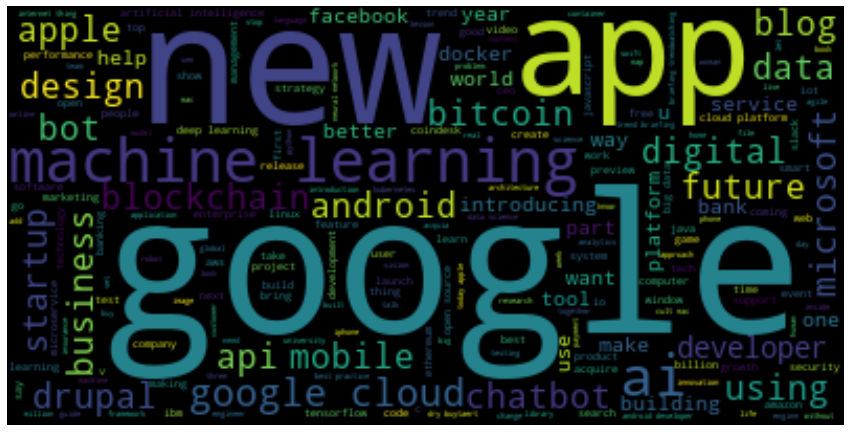

In [449]:
plt.figure(figsize = (15, 10))
wordcloud = WordCloud().generate(" ".join(preprocessed_title))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

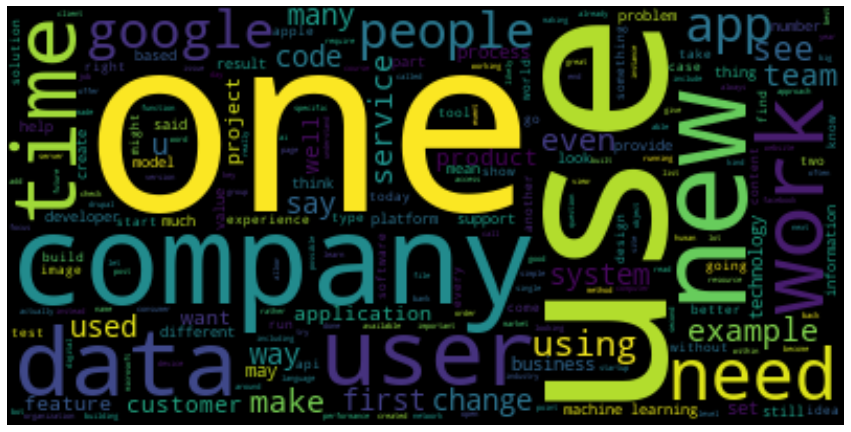

In [450]:
plt.figure(figsize = (15, 10))
wordcloud = WordCloud().generate(" ".join(preprocessed_text))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [453]:
vectorizer = CountVectorizer()
vectorized_title = vectorizer.fit_transform(preprocessed_title)
vectorized_text = vectorizer.fit_transform(preprocessed_text)

In [454]:
linear_kernel(vectorized_text.toarray()[0: 1], vectorized_text).flatten()

array([2300., 2300.,   69., ...,  934.,  507.,   18.])

In [469]:
similar_document_indices = euclidean_distances(vectorized_text.toarray()[3: 4], vectorized_text).flatten().argsort()[1: 10]

In [470]:
similar_document_indices

array([1504,  719, 1744,  920, 1313, 1008, 1012, 1168, 1678], dtype=int64)

In [475]:
df.iloc[similar_document_indices, :].iloc[: 5]

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
2032,1470872079,CONTENT SHARED,-8815620240581422908,881856221521045800,-6443124096966155946,NaN,NaN,NaN,HTML,http://www.forbes.com/sites/tomgillis/2016/08/...,"Agility in the Cloud: Which ""As a Service"" Wor...",The data center is fundamentally changing. Yet...,en
877,1462899171,CONTENT SHARED,279771472506428952,-8845298781299428018,414537565071856330,NaN,NaN,NaN,HTML,http://www.forbes.com/sites/janakirammsv/2016/...,5 Unique Features Of Google Compute Engine Tha...,"Google Compute Engine (GCE), the infrastructur...",en
2374,1474311710,CONTENT SHARED,7756118769128656312,3829784524040647339,4404062714242930135,NaN,NaN,NaN,HTML,http://simplystatistics.org/2016/09/19/msdr-la...,Mastering Software Development in R · Simply S...,This sequence differs from our previous Data S...,en
1165,1464721873,CONTENT SHARED,-7152753999571084411,3609194402293569455,4752652671493723871,NaN,NaN,NaN,HTML,http://trendwatching.com/trends/digital-data-d...,New Asia Trend Briefing from TrendWatching | A...,We're living through a data bonanza. Digital i...,en
1707,1468000605,CONTENT SHARED,9079880752026843473,7527226129639571966,2973078457109900343,NaN,NaN,NaN,HTML,https://uxdesign.cc/design-better-forms-96fadc...,Design Better Forms - uxdesign.cc - User Exper...,Why ask? Omit optional fields and think of oth...,en


In [476]:
df.text.iloc[4]

'The Aite Group projects the blockchain market could be valued at $400 million by 2019. For that reason, some of the biggest names in banking, industry and technology have entered into the space to evaluate how this technology could change the financial world. IBM and Linux, for instance, have brought together some of the brightest minds in the industry and technology to work on blockchain technology through the Hyperledger Project. The Hyperledger Project is under the umbrella of the Linux Foundation, and seeks to incorporate findings by blockchain projects such as Blockstream, Ripple, Digital Asset Holdings and others in order to make blockchain technology useful for the world\'s biggest corporations. IBM has also contributed its own code to the project. According to John Wolpert, IBM\'s Global Blockchain Offering Director, when IBM and Linux began working together on the blockchain project, Linux made clear it wanted to "disrupt the disruption," in part with their findings, as well 

In [482]:
df.iloc[similar_document_indices, :].iloc[3].text

"We're living through a data bonanza. Digital innovators, startup founders, marketers and CEOs can't get enough customer data. And in Asia - the global epicenter of digital consumerism - the data is pouring in! But amid the excitement of the data onslaught - tell me who my customers are! Where they've been! Who they like! What they BUY! - it's easy to miss one simple truth. The best customer data and the most sophisticated tech won't get you anywhere unless you use it to create new products, services, campaigns that your customers love. Consumers are willing to share data and information - with the condition that brands use it to make life better for them. So the big question: how can roll out data-fueled offerings that do just that? Luckily, we have some thoughts ;)"

In [296]:
df.title.iloc[0]

"Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's"

In [317]:
vectorizer = TfidfVectorizer()
tfidf_vectorized_text = vectorizer.fit_transform(preprocessed_text)
tfidf_vectorized_title = vectorizer.fit_transform(preprocessed_title)

In [318]:
tfidf_vectorized_text

<2264x40660 sparse matrix of type '<class 'numpy.float64'>'
	with 672524 stored elements in Compressed Sparse Row format>

In [319]:
tfidf_vectorized_text.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05741444, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.09864278, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0712892 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [320]:
similar_document_indices = euclidean_distances(tfidf_vectorized_text.toarray()[0: 1], tfidf_vectorized_text).flatten().argsort()[0: 10]

In [328]:
df.loc[similar_document_indices, :].iloc[5].text

"A few weeks ago I had to go through the process of setting up php code sniffer on my new computer, and realised how confusing most of the blog posts out there are and how many loops and posts you have to jump through to get it set up. I decided to write a quick post with all the commands in one place and small descriptions for most of the commands: Installing Drupal Coding Sniffer 1. Download php code sniffer (source code: curl -OL curl -OL sudo mv phpcs.phar /usr/bin/phpcs sudo mv phpcbf.phar /usr/bin/phpcbf sudo chmod a+x /usr/bin/phpc* Test that it's installed by running phpcs -h and it should output the code sniffer help. 2. Download the Coder module Note: download the 8.x branch, even if you intend to use it on Drupal 7. You can download it in any 'normal' folder, but not in a Drupal project. cd /folder/where/i/want/coder drush dl coder It should download the latest version which is 8.x - if it doesn't then add --select to the drush command and choose the 8.x branch. 3. Add Drupa

In [337]:
#!c:\python38\python.exe -m pip install gensim

In [339]:
import gensim
from gensim import corpora
from pprint import pprint

In [345]:
documents = ["The Saudis are preparing a report that will acknowledge that", 
             "Saudi journalist Jamal Khashoggi's death was the result of an", 
             "interrogation that went wrong, one that was intended to lead", 
             "to his abduction from Turkey, according to two sources."]

documents_2 = ["One source says the report will likely conclude that", 
                "the operation was carried out without clearance and", 
                "transparency and that those involved will be held", 
                "responsible. One of the sources acknowledged that the", 
                "report is still being prepared and cautioned that", 
                "things could change."]

# Tokenize(split) the sentences into words
texts = [[text for text in doc.split()] for doc in documents]
print(texts)
# Create dictionary
dictionary = corpora.Dictionary(texts)

# Get information about the dictionary
print(dictionary)

[['The', 'Saudis', 'are', 'preparing', 'a', 'report', 'that', 'will', 'acknowledge', 'that'], ['Saudi', 'journalist', 'Jamal', "Khashoggi's", 'death', 'was', 'the', 'result', 'of', 'an'], ['interrogation', 'that', 'went', 'wrong,', 'one', 'that', 'was', 'intended', 'to', 'lead'], ['to', 'his', 'abduction', 'from', 'Turkey,', 'according', 'to', 'two', 'sources.']]
Dictionary(33 unique tokens: ['Saudis', 'The', 'a', 'acknowledge', 'are']...)


In [483]:
dictionary.token2id

{'Saudis': 0,
 'The': 1,
 'a': 2,
 'acknowledge': 3,
 'are': 4,
 'preparing': 5,
 'report': 6,
 'that': 7,
 'will': 8,
 'Jamal': 9,
 "Khashoggi's": 10,
 'Saudi': 11,
 'an': 12,
 'death': 13,
 'journalist': 14,
 'of': 15,
 'result': 16,
 'the': 17,
 'was': 18,
 'intended': 19,
 'interrogation': 20,
 'lead': 21,
 'one': 22,
 'to': 23,
 'went': 24,
 'wrong,': 25,
 'Turkey,': 26,
 'abduction': 27,
 'according': 28,
 'from': 29,
 'his': 30,
 'sources.': 31,
 'two': 32}

In [484]:
import gensim.downloader as api

In [489]:
wv = api.load('word2vec-google-news-300')

In [487]:
len(wv['king'])

300

In [488]:
wv['queen']

array([ 0.00524902, -0.14355469, -0.06933594,  0.12353516,  0.13183594,
       -0.08886719, -0.07128906, -0.21679688, -0.19726562,  0.05566406,
       -0.07568359, -0.38085938,  0.10400391, -0.00081635,  0.1328125 ,
        0.11279297,  0.07275391, -0.046875  ,  0.06591797,  0.09423828,
        0.19042969,  0.13671875, -0.23632812, -0.11865234,  0.06542969,
       -0.05322266, -0.30859375,  0.09179688,  0.18847656, -0.16699219,
       -0.15625   , -0.13085938, -0.08251953,  0.21289062, -0.35546875,
       -0.13183594,  0.09619141,  0.26367188, -0.09472656,  0.18359375,
        0.10693359, -0.41601562,  0.26953125, -0.02770996,  0.17578125,
       -0.11279297, -0.00411987,  0.14550781,  0.15625   ,  0.26757812,
       -0.01794434,  0.09863281,  0.05297852, -0.03125   , -0.16308594,
       -0.05810547, -0.34375   , -0.17285156,  0.11425781, -0.09033203,
        0.13476562,  0.27929688, -0.04980469,  0.12988281,  0.17578125,
       -0.22167969, -0.01190186,  0.140625  , -0.18164062,  0.11